## Linear Regression:
* Linear regression is supervied machine learning model which perform regression by plotting a straight line which best fit the data points.
* The goal of linear regression is to find the best-fitting line that minimizes the difference between the predicted values and the actual values of the dependent variable. This line is often represented by the equation:

Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ

Where:

Y is the dependent variable, X₁, X₂, ..., Xₙ are the independent variables, β₀, β₁, β₂, ..., βₙ are the coefficients (also called the intercept and slopes)

Assumption :
1. Linearity: The relationship between the dependent variable and the independent variables is assumed to be linear. This means that the change in the dependent variable is directly proportional to the change in the independent variable(s). Nonlinear relationships may require alternative regression techniques.
2. Homoscedasticity: The residuals (the differences between the observed and predicted values) should have constant variance across all levels of the independent variables. This assumption is known as homoscedasticity. If the variance of the residuals is unequal, it indicates heteroscedasticity, which can affect the reliability of the model's predictions.
3. No multicollinearity: The independent variables should not be highly correlated with each other. Multicollinearity makes it challenging to isolate the individual effects of each independent variable and can lead to unstable coefficient estimates.
4. Normality: The residuals should follow a normal distribution. This assumption is important for conducting hypothesis tests, constructing confidence intervals, and making accurate predictions. Departure from normality can affect the validity of statistical inferences.

### Simple Linear Regression:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
df=pd.read_csv('Salary_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.shape

(30, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [6]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


Unnamed is a sequencial column i will drop it.

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [13]:
df.duplicated().sum()

0

Data is cleaned

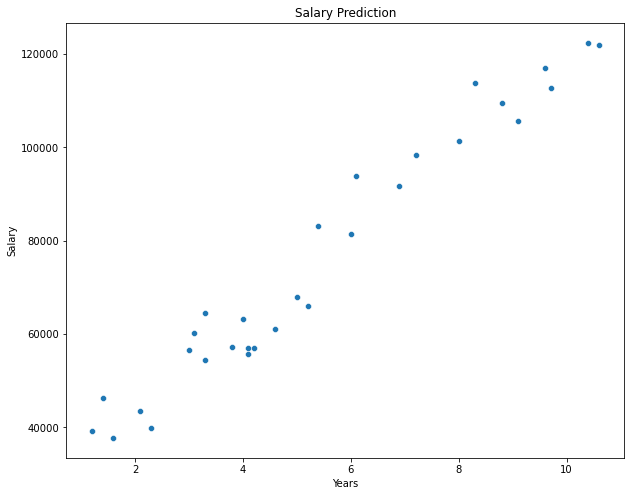

In [18]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(10,8))
sns.scatterplot(x=df['YearsExperience'],y=df['Salary'])
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

There is a linear relationship between independant and dependant variables.

## Splitting the data

In [20]:
X=df['YearsExperience']
Y=df['Salary']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=42) #taking 70% training size

In [23]:
# Create new axis for x column
x_train = x_train[:,np.newaxis]
x_test = x_test[:,np.newaxis]

## Model Building

In [24]:
lr=LinearRegression()

lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

In [28]:
print('mean square error:',mean_squared_error(y_test,y_pred))
print('mean absolute error',mean_absolute_error(y_test,y_pred))
print('r2_score:',r2_score(y_test,y_pred))

mean square error: 37784662.46621308
mean absolute error 5161.328710400178
r2_score: 0.9414466227178215


We are getting good r2 score, so our model is performing well.

In [29]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 24985.53016251169
Coefficient of the line: [9339.08172382]


Equation on line is :

y= 9339x + 24986

## Conclusion:
* In this nootbook, i build a simple linear regession model on salary dataset which is performing well with 94% accuracy.